In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import datetime as dt
sys.path.append('../src')
import mta_data_clean as mc

In [3]:
data_path = '../data/'
pickle_file = 'mta_data.pickle'
busy_pickle_file = 'mta_busy_stations.pickle'

In [47]:
df = mc.mta_data_pickle_read(data_path+busy_pickle_file)
df.reset_index(inplace=True, drop=True)

In [48]:
df.describe()

,entries,exits,deltaEntry,deltaExit
count,3.646490e+05,3.646490e+05,364649.000000,364649.000000
mean,5.863907e+07,5.350230e+07,196.661093,179.038988
std,2.574103e+08,2.503959e+08,311.406071,309.090482
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.162760e+05,4.069420e+05,0.000000,0.000000
50%,3.590709e+06,2.239156e+06,49.000000,51.000000
75%,8.888716e+06,6.873947e+06,273.000000,232.000000
max,2.129395e+09,2.048360e+09,6552.000000,9430.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364649 entries, 0 to 1221040
Data columns (total 10 columns):
station       364649 non-null object
division      364649 non-null object
date          364649 non-null datetime64[ns]
time          364649 non-null object
desc          364649 non-null object
entries       364649 non-null int64
exits         364649 non-null int64
weekday       364649 non-null object
deltaEntry    364649 non-null int64
deltaExit     364649 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 30.6+ MB


In [170]:
chosen_stations = ['42 St-Port Auth', 'Path New Wtc', '14 St', '28 St', '42 St-Bryant Pk', '47-50 Sts Rock', '86 St', 'Chambers St', '34 St-Penn St', 'Grd Cntrl-42 St', '34 St-Herald Sq', '23 St', '14 St-Union Sq', 'Fulton St']


,station,division,date,time,desc,entries,exits,weekday,deltaEntry,deltaExit
840,34 ST-HERALD SQ,BMT,2019-03-30,00:00:00,REGULAR,26712002,11049512,Saturday,0,0
841,34 ST-HERALD SQ,BMT,2019-03-30,04:00:00,REGULAR,26712190,11049552,Saturday,188,40
842,34 ST-HERALD SQ,BMT,2019-03-30,08:00:00,REGULAR,26712255,11049619,Saturday,65,67
843,34 ST-HERALD SQ,BMT,2019-03-30,12:00:00,REGULAR,26712590,11050076,Saturday,335,457
844,34 ST-HERALD SQ,BMT,2019-03-30,16:00:00,REGULAR,26713481,11050772,Saturday,891,696


## Chosen stations by time/weekday

In [176]:
stations_sorted = df.sort_values('deltaEntry', ascending = False).groupby('station').head(1)
stations_sorted = stations_sorted[stations_sorted['station'].str.title().isin(chosen_stations)]
stations_sorted.drop(columns = ['division','date','desc','entries','exits'], inplace = True)
stations_sorted

,station,time,weekday,deltaEntry,deltaExit
357106,GRD CNTRL-42 ST,20:00:00,Thursday,3199,32
124063,14 ST-UNION SQ,21:00:00,Wednesday,2830,161
122248,34 ST-HERALD SQ,20:00:00,Tuesday,2693,469
199736,14 ST,21:00:00,Thursday,2577,33
94645,PATH NEW WTC,19:47:50,Tuesday,2447,233
208158,47-50 STS ROCK,20:00:00,Thursday,2155,238
210220,42 ST-BRYANT PK,20:00:00,Thursday,2068,255
321646,23 ST,20:00:00,Wednesday,2007,134
14051,42 ST-PORT AUTH,12:00:00,Monday,1951,47
280461,CHAMBERS ST,20:00:00,Tuesday,1808,226


## Chosen stations by traffic

In [173]:
deltaEntry_sorted = chosen_df.groupby('station', as_index = False,sort = True).sum()
deltaEntry_sorted = deltaEntry_sorted.sort_values(['deltaEntry','deltaExit'], ascending = [False,False])
deltaEntry_sorted.drop(columns=['entries','exits'], inplace = True)
deltaEntry_sorted

,station,deltaEntry,deltaExit
11,GRD CNTRL-42 ST,4920152,4416356
4,34 ST-HERALD SQ,3650456,3877498
2,23 ST,3604025,2802673
1,14 ST-UNION SQ,3387368,3443652
10,FULTON ST,3235959,2818776
6,42 ST-PORT AUTH,3061583,2683637
8,86 ST,2797842,2579962
9,CHAMBERS ST,1909381,1552828
0,14 ST,1869313,1688395
7,47-50 STS ROCK,1834640,2122619


## Sum of deltaEntry by Weekday

In [38]:
pd.pivot_table(df, index = ['weekday'],values = ['deltaEntry','deltaExit'], aggfunc =[np.sum])

sum          
          deltaEntry deltaExit
weekday                       
Friday      11527266  10561840
Monday      11987867  10670852
Saturday     6036634   5870317
Sunday       4705682   4460417
Thursday    12483572  11272520
Tuesday     12456221  11171322
Wednesday   12515029  11279120

## Sum of deltaEntry by Weekday -- SORTED

In [19]:
grouped = df.groupby('weekday').deltaEntry.sum().reset_index()
grouped_sorted = grouped.sort_values('deltaEntry', ascending=False)
grouped_sorted

,weekday,deltaEntry
6,Wednesday,12515029
4,Thursday,12483572
5,Tuesday,12456221
1,Monday,11987867
0,Friday,11527266
2,Saturday,6036634
3,Sunday,4705682


In [84]:
pd.pivot_table(df, index = 'station' ,values = ['deltaEntry','deltaExit'], aggfunc =[np.sum])

sum          
                deltaEntry deltaExit
station                             
125 ST             2512239   2084396
14 ST              1869313   1688395
14 ST-UNION SQ     3387368   3443652
23 ST              3604025   2802673
28 ST              1572317   1474767
34 ST-HERALD SQ    3650456   3877498
34 ST-PENN STA     5556383   5164238
42 ST-BRYANT PK    1149726   1264427
42 ST-PORT AUTH    3061583   2683637
47-50 STS ROCK     1834640   2122619
50 ST              1582582   1383501
59 ST              2059341   1834433
59 ST COLUMBUS     2362058   2116083
7 AV               1358134   1206534
72 ST              1596387   1448037
86 ST              2797842   2579962
96 ST              2192038   1648574
ATL AV-BARCLAY     1417548   1368551
B'WAY-LAFAYETTE     732438   1039888
CANAL ST           2429787   2110979
CHAMBERS ST        1909381   1552828
CHURCH AV          1273890    803408
FLUSHING-MAIN      1710370   1312974
FULTON ST          3235959   2818776
GRD CNTRL-42 ST    4920152   4416356
JAY ST-METROTEC    1389967    837792
JKSN HT-ROOSVLT    1717401   1153191
LEXINGTON AV/53    1237885   1436436
PATH NEW WTC       1785783   1681047
TIMES SQ-42 ST     2994944   3249647
W 4 ST-WASH SQ     1368027   1425148
WALL ST            1442307   1255941

## For Appendix -- Stations sorted by Traffic

In [225]:
new_df = df.groupby(['station'], sort=True).sum().reset_index()
new_df = new_df.sort_values(['deltaEntry', 'deltaExit'], ascending=[False,False])
new_df = new_df.drop(columns=['entries','exits'])
new_df

,station,deltaEntry,deltaExit
6,34 ST-PENN STA,5556383,5164238
24,GRD CNTRL-42 ST,4920152,4416356
5,34 ST-HERALD SQ,3650456,3877498
3,23 ST,3604025,2802673
2,14 ST-UNION SQ,3387368,3443652
23,FULTON ST,3235959,2818776
8,42 ST-PORT AUTH,3061583,2683637
29,TIMES SQ-42 ST,2994944,3249647
15,86 ST,2797842,2579962
0,125 ST,2512239,2084396


## Line Graph - 1 Station: Time vs deltaEntry / Exit

In [140]:
one_station = df[df['station']=='42 ST-BRYANT PK'].reset_index(drop=True)
one_station['hours'] = [one_station['time'][x].hour for x in range(len(one_station['time']))]
time_df = one_station.groupby('hours', sort=True).sum().reset_index()
time_df = time_df.sort_values(['hours'])
time_df = time_df.drop(columns=['entries','exits'])
time_df.head(10)



,hours,deltaEntry,deltaExit
0,0,0,0
1,4,28545,11285
2,8,25823,152637
3,9,408,3572
4,12,119861,614611
5,16,261987,255011
6,20,713102,227311


(8, 20)

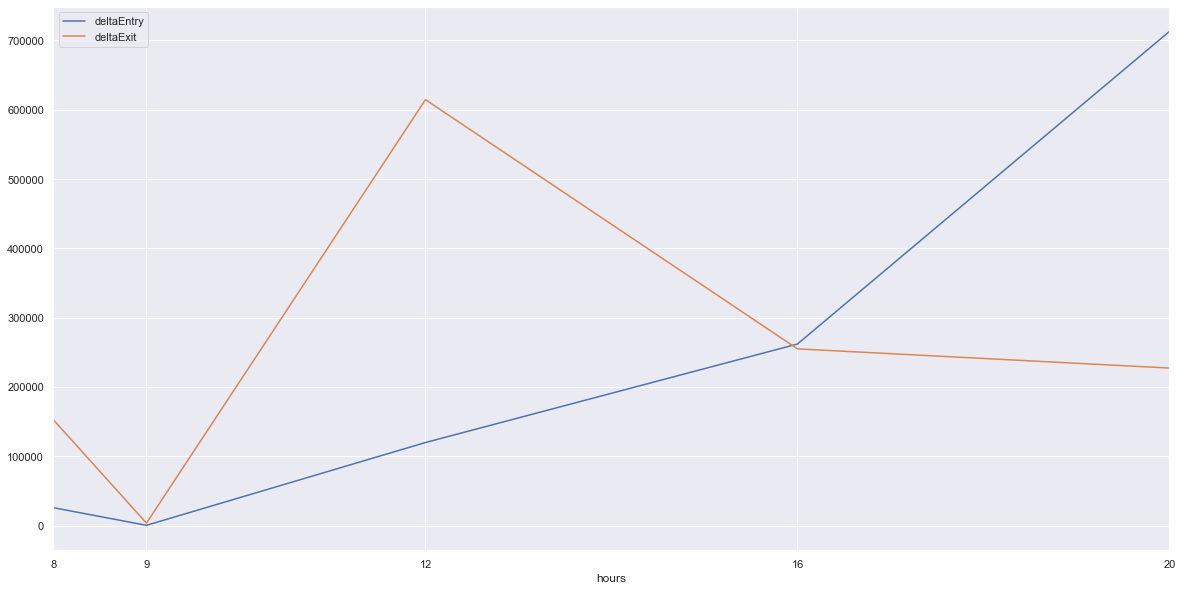

In [156]:
positions = [8,9,12,16,20]
labels = time_df['hours']
time_df.plot(x='hours',figsize = [20,10])
plt.xticks(positions)
plt.xlim([8,20])


In [111]:
hours = [time_df['time'][x].hour for x in range(len(time_df['time']))]
print(hours)
plt.hist(x = hours, height = time_df['deltaEntry'])

[0, 4, 8, 8, 9, 9, 12, 16, 20]


(array([1., 0., 1., 0., 4., 0., 1., 0., 1., 1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

ValueError: setting an array element with a sequence.

<Figure size 432x288 with 1 Axes>

## Bar Graph - Delta Entry / Exit by Weekday

In [187]:
a_df = df.groupby(['weekday'], sort=True).sum().reset_index()
a_df = a_df.sort_values(['deltaEntry', 'deltaExit'], ascending=[False,False])
a_df = a_df.drop(columns=['entries','exits'])
a_df

,weekday,deltaEntry,deltaExit
6,Wednesday,12515029,11279120
4,Thursday,12483572,11272520
5,Tuesday,12456221,11171322
1,Monday,11987867,10670852
0,Friday,11527266,10561840
2,Saturday,6036634,5870317
3,Sunday,4705682,4460417


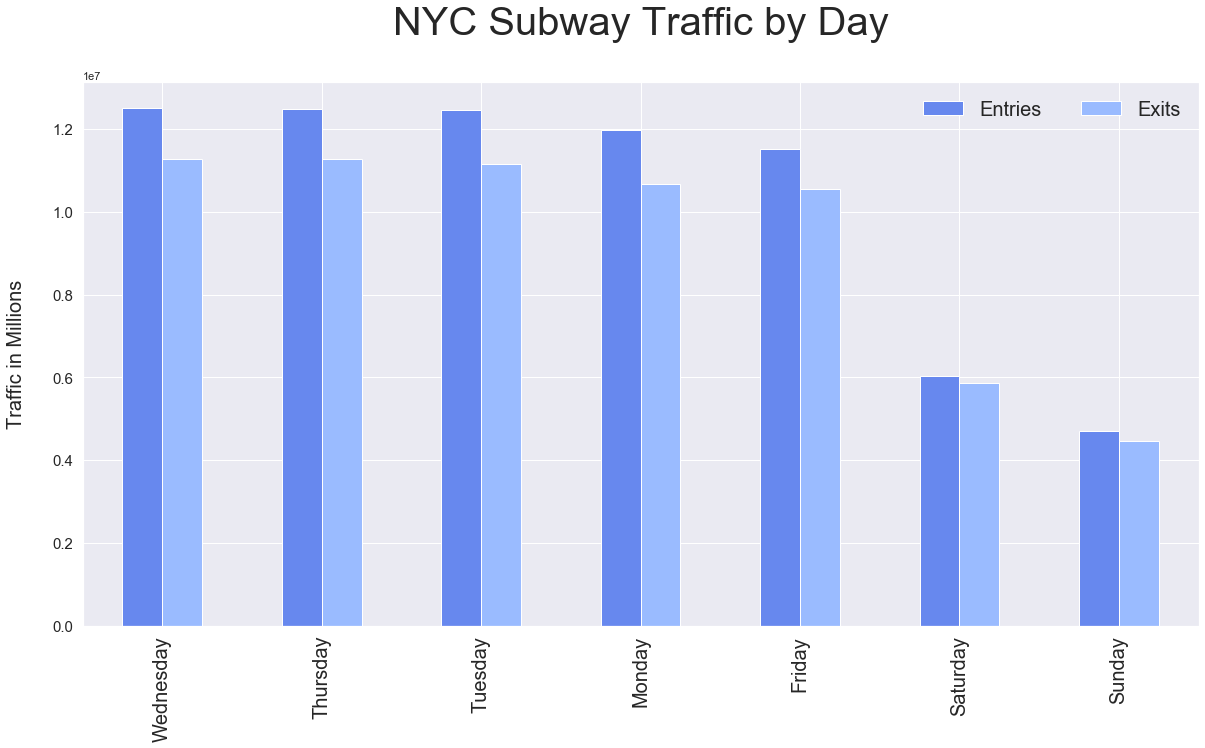

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("coolwarm")

a_df.plot(kind= 'bar',figsize = [20,10])

positions = [0,1,2,3,4,5,6]
weekdays = ('Wednesday','Thursday','Tuesday','Monday','Friday','Saturday','Sunday')
labels = weekdays

plt.ylabel('Traffic in Millions\n', fontsize = 20)
plt.title('NYC Subway Traffic by Day\n', fontsize =40)
plt.yticks(fontsize = 15)
plt.xticks(positions,labels, fontsize = 20)
plt.legend(['Entries','Exits'], prop ={'size':20}, shadow = True, frameon = False, ncol = 2, loc = 'upper right')

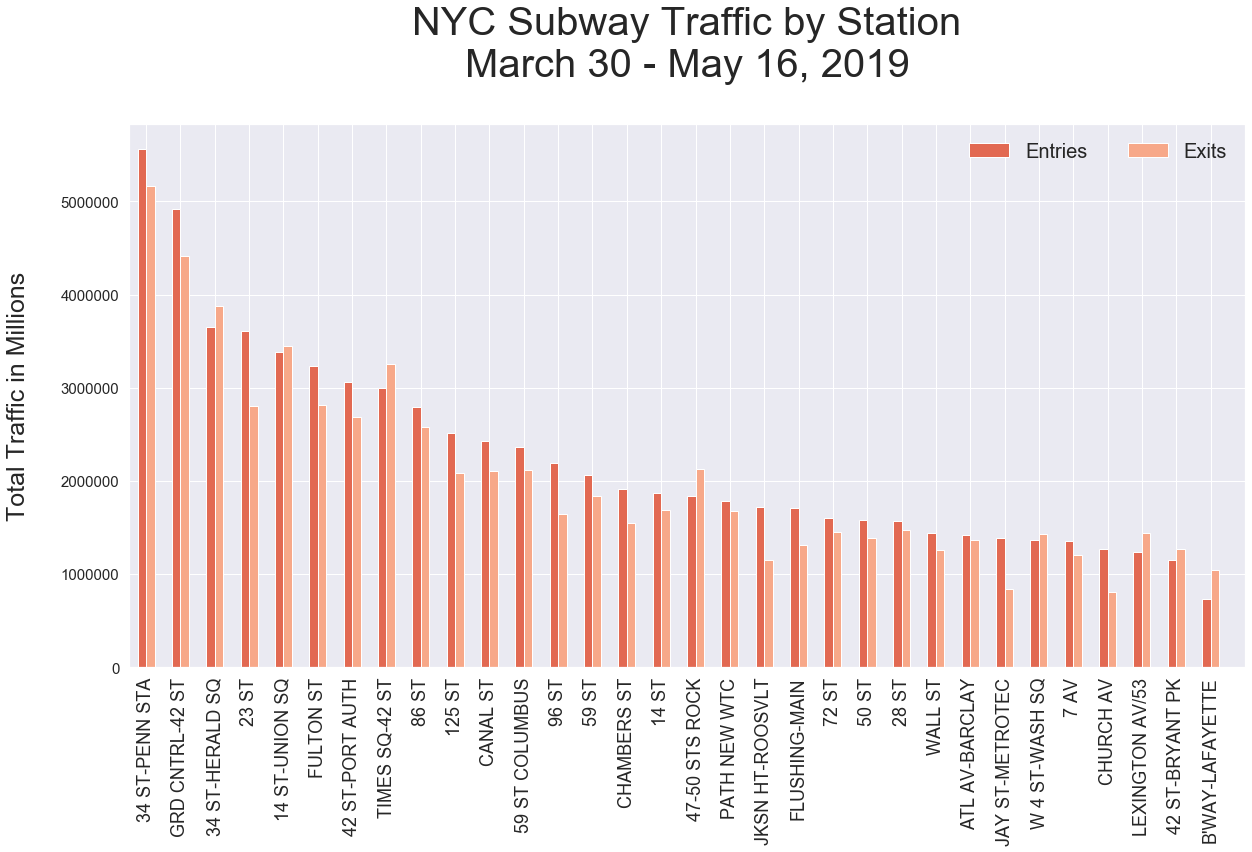

In [251]:
pd.pivot_table(df, index = 'station' ,values = ['deltaEntry'], aggfunc =[np.sum])
sns.set()
sns.set_palette("coolwarm_r")
new_df.plot(kind= 'bar', figsize = [20,10])

labels = new_df['station']
position = range(0,33)
plt.xticks(position, labels, fontsize = 18,)
plt.yticks(fontsize = 15)
plt.ylabel('Total Traffic in Millions\n', fontsize = 25)
plt.title('NYC Subway Traffic by Station\nMarch 30 - May 16, 2019\n', fontsize =40)
plt.legend(['Entries','Exits'], prop={'size':20}, frameon = False, ncol =2, loc = 'upper right')

## Bar Graph -- All Stations: Traffic by Day

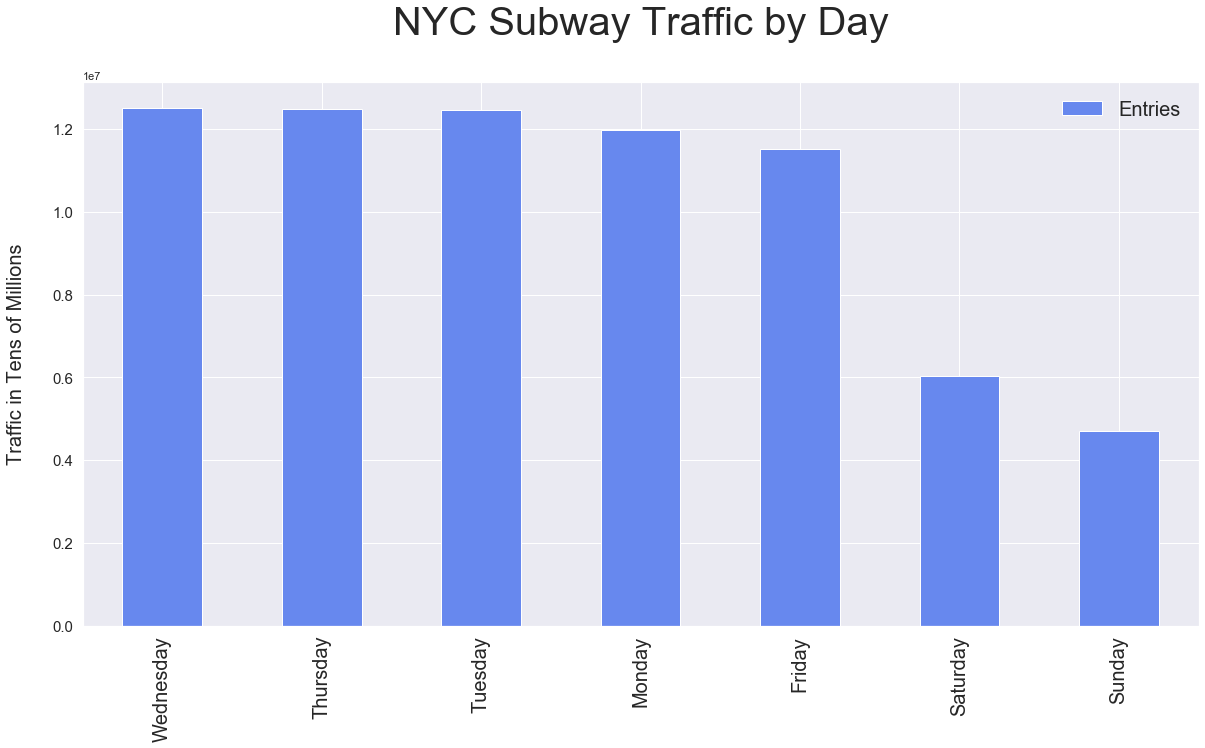

In [252]:
grouped = df.groupby('weekday').deltaEntry.sum().reset_index()
grouped_sorted = grouped.sort_values(['deltaEntry'], ascending=False)

sns.set()
sns.set_palette("coolwarm")
grouped_sorted.plot(kind= 'bar',figsize = [20,10])

positions = [0,1,2,3,4,5,6]
weekdays = ('Wednesday','Thursday','Tuesday','Monday','Friday','Saturday','Sunday')
labels = weekdays

plt.ylabel('Traffic in Tens of Millions\n', fontsize = 20)
plt.title('NYC Subway Traffic by Day\n', fontsize =40)
plt.yticks(fontsize = 15)
plt.xticks(positions,labels, fontsize = 20)
plt.legend(['Entries','Exits'], prop ={'size':20}, shadow = True, frameon = False, ncol = 2, loc = 'upper right')

In [253]:
grouped_sorted

,weekday,deltaEntry
6,Wednesday,12515029
4,Thursday,12483572
5,Tuesday,12456221
1,Monday,11987867
0,Friday,11527266
2,Saturday,6036634
3,Sunday,4705682
